## IMDb Rating (Calificación en IMDb)
--Medidas de tendencia central: La media muestra la calificación promedio que los episodios reciben en IMDb. Si la mediana es cercana a la media, la distribución de calificaciones es simétrica. Si hay una moda que difiere de la media, esto puede indicar que hay calificaciones frecuentes en un valor específico, como "7" o "8".

--Medidas de dispersión: El rango te dice la diferencia entre las calificaciones más altas y las más bajas. La desviación estándar indica cuánto varían las calificaciones alrededor de la media. Un valor bajo de desviación significa que las calificaciones son consistentes; un valor alto sugiere mayor variabilidad.
### Gráficos:
--Histograma: Permite ver la frecuencia de calificaciones en cada intervalo, indicando si hay más episodios con calificaciones altas o bajas.

--Polígono de frecuencias: Resalta la distribución de calificaciones de forma continua. Una forma simétrica sugiere una distribución normal, mientras que una asimetría indica una mayor concentración de calificaciones altas o bajas.

--Ojiva: La ojiva muestra cómo se acumulan las calificaciones, permitiendo ver si la mayoría de episodios se encuentran en calificaciones bajas o altas.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\Martina\Documents\TUP\Estadistica y Probabilidad\TPI")

# Carga el archivo CSV en un dataframe de Pandas
df = pd.read_csv('data\simpsons_episodes.csv')
# Imprime el dataframe
print(df)

# Función para calcular medidas de tendencia central
def calcular_medidas_tendencia_central(serie):
    media = serie.mean()       # Media aritmética
    mediana = serie.median()   # Mediana
    moda = serie.mode()        # Moda (puede haber más de una moda)
    return media, mediana, moda

# Función para calcular medidas de dispersión
def calcular_medidas_dispersion(serie):
    rango = serie.max() - serie.min()  # Rango
    varianza = serie.var()             # Varianza
    desviacion_estandar = serie.std()  # Desviación estándar
    return rango, varianza, desviacion_estandar

      id                                          image_url  imdb_rating  \
0     10  http://static-media.fxx.com/img/FX_Networks_-_...          7.4   
1     12  http://static-media.fxx.com/img/FX_Networks_-_...          8.3   
2     14  http://static-media.fxx.com/img/FX_Networks_-_...          8.2   
3     17  http://static-media.fxx.com/img/FX_Networks_-_...          8.1   
4     19  http://static-media.fxx.com/img/FX_Networks_-_...          8.0   
..   ...                                                ...          ...   
595  500  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   
596  502  http://static-media.fxx.com/img/FX_Networks_-_...          7.3   
597  511  http://static-media.fxx.com/img/FX_Networks_-_...          6.9   
598  542  http://static-media.fxx.com/img/FX_Networks_-_...          6.4   
599  548  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   

     imdb_votes  number_in_season  number_in_series original_air_date  \
0        1511.

In [2]:
#TABLA DE DISTRIBUCIÓN DE FRECUENCIAS 
#imb_rating es una variable continua
ratings = df['imdb_rating'].dropna()#borra las filas con valores nulos


# Define el número de clases usando la fórmula de Sturges
num_classes = int(1 + 3.322 * np.log10(len(ratings)))

# Crea el histograma para obtener las frecuencias
freq_abs, bins = np.histogram(ratings, bins=num_classes)
freq_rel = freq_abs / len(ratings)  # Frecuencia relativa
freq_cum = np.cumsum(freq_abs)       # Frecuencia acumulada


# Tabla de frecuencias
freq_table = pd.DataFrame({
    'Clase': [f"{round(bins[i], 2)} - {round(bins[i+1], 2)}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table)


         Clase  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0   4.5 - 4.97                    1             0.001675                     1
1  4.97 - 5.44                    1             0.001675                     2
2  5.44 - 5.91                    8             0.013400                    10
3  5.91 - 6.38                   24             0.040201                    34
4  6.38 - 6.85                  100             0.167504                   134
5  6.85 - 7.32                  211             0.353434                   345
6  7.32 - 7.79                   67             0.112228                   412
7  7.79 - 8.26                  102             0.170854                   514
8  8.26 - 8.73                   60             0.100503                   574
9   8.73 - 9.2                   23             0.038526                   597


In [3]:
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(ratings)
print(f"Medidas de tendencia central para ratings:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad

------------------------------------------
Medidas de tendencia central para ratings:
  Media: 7.38609715242881
  Mediana: 7.3
  Moda: [7.3]



In [4]:
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(ratings)
print(f"Medidas de dispersión para ratings:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")

------------------------------------------
Medidas de dispersión para ratings:
  Rango: 4.699999999999999
  Varianza: 0.5364674603442267
  Desviación Estándar: 0.7324393902188949



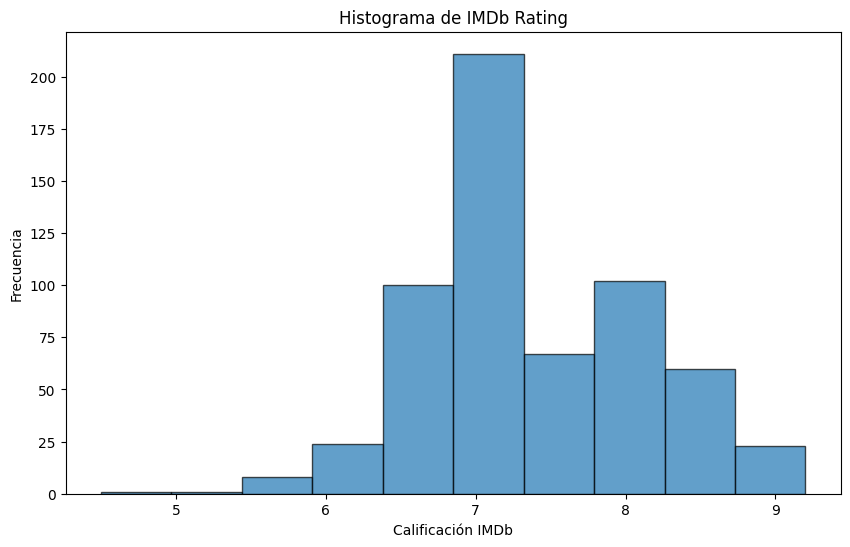

In [5]:
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de IMDb Rating")
plt.xlabel("Calificación IMDb")
plt.ylabel("Frecuencia")
plt.show()

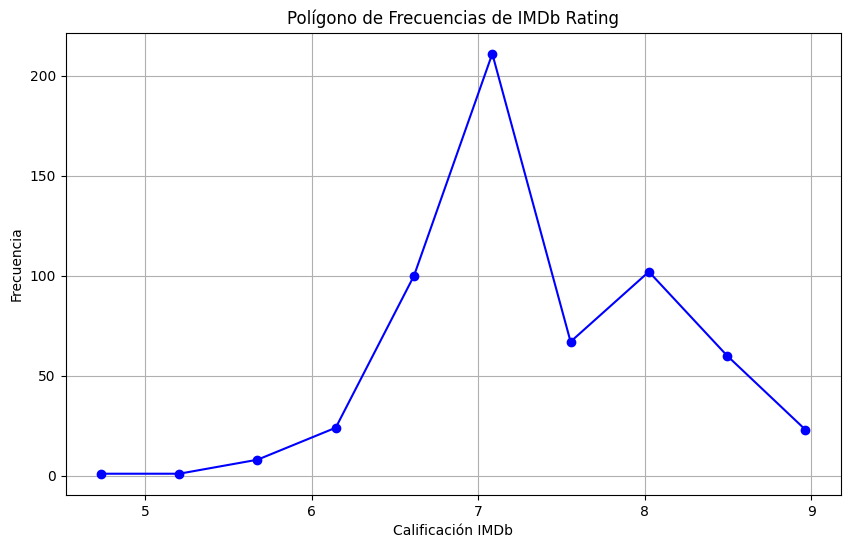

In [6]:
# Polígono de Frecuencias
# Calcula las frecuencias absolutas y los puntos medios de cada clase
freq_abs, bins = np.histogram(ratings, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de IMDb Rating")
plt.xlabel("Calificación IMDb")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

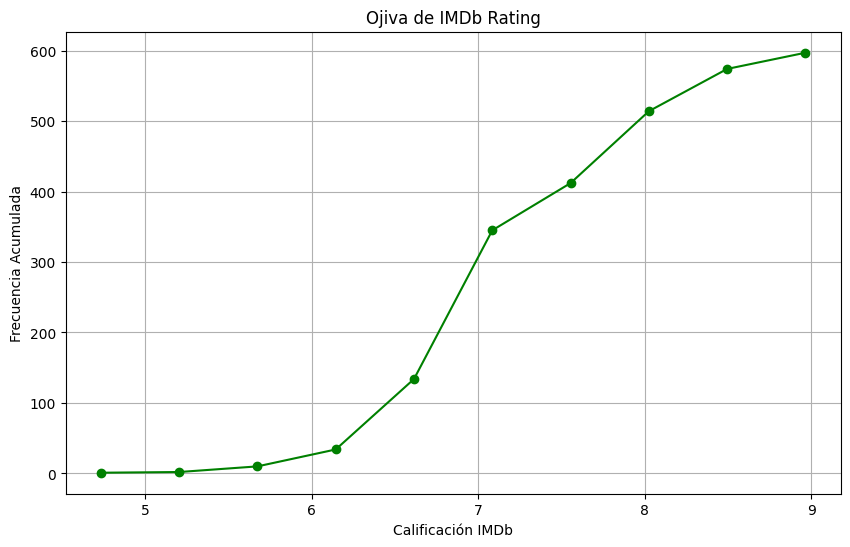

In [7]:
# Ojiva (Frecuencia Acumulada)
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de IMDb Rating")
plt.xlabel("Calificación IMDb")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()